### Modelos baseados em árvores

<br>

Ao longo do módulo, discutimos bastante as árvores de decisão, bem como ensemble de árvores, como Random Forest e algoritmos do tipo boosting.

Esses __ensembles acabam tendo muitos hiperparâmetros;__ escolhe-los de forma manual acaba sendo muito custoso e tedioso. 

Neste exercício, vamos discutir a respeito da metolodia __grid-search__, que otimiza essa busca de hiperparâmetros.

Considere o dataset abaixo (basta executar as células):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [3]:
#problema de regressão

X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(331, 10) (111, 10) (331,) (111,)


Imagine que queremos testar - usando cross-validation - várias instâncias de Random Forests: com 10 árvores, com 100 árvores, com 1000 árvores, com profundidade máxima 1, 5, 10. 

Como podemos proceder? O código abaixo exemplifica um jeito:

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for n_est in [10,100,100]:
    for prof in [1,5,10]:
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=prof)
        cvres = cross_val_score(estimator=rf, X = Xtrain, y = ytrain, cv = 3, scoring='r2')
        print("estimators: ", n_est, " prof: ", prof, " | R2 mean / std: ", cvres.mean(), ' / ', cvres.std())

estimators:  10  prof:  1  | R2 mean / std:  0.31735167782404833  /  0.06242409820530957
estimators:  10  prof:  5  | R2 mean / std:  0.39666838621627204  /  0.03502013776737483
estimators:  10  prof:  10  | R2 mean / std:  0.35732809800073123  /  0.042344938854174716
estimators:  100  prof:  1  | R2 mean / std:  0.344472356012991  /  0.026872249186482972
estimators:  100  prof:  5  | R2 mean / std:  0.42980570242802546  /  0.03158223983008126
estimators:  100  prof:  10  | R2 mean / std:  0.4237064419545111  /  0.0340173626472334
estimators:  100  prof:  1  | R2 mean / std:  0.3353845819509873  /  0.038069285288846795
estimators:  100  prof:  5  | R2 mean / std:  0.42645440444948984  /  0.04000464460606043
estimators:  100  prof:  10  | R2 mean / std:  0.4242734665297208  /  0.03607606217026023


Podemos, com algum trabalho, escolher o melhor modelo.

Se quisermos testar mais parâmetros, podemos aumentar nosso loop... mais isso vai ficando cada vez mais complicado.

A proposta do __grid-search__ é justamente fazer isso de forma mais automática!

Podemos importar a função GridSearchCV do módulo model_selection do sklearn e usá-la para isso. 
Na prática, precisamos definir um __estimador base__ para o grid. Além disso, precisamos definir um __dicionário de parâmetros__ a ser testado. Ainda, definiremos a quantidade de folds para cross-validation e qual a métrica de performance que queremos otimizar:

In [5]:
#importando a função
from sklearn.model_selection import GridSearchCV

In [6]:
#definindo o estimador base
estimador_base = RandomForestRegressor()

#definindo o dicionario de parâmetros do modelo
params_RF = {"n_estimators":[10,1000], "max_depth":[2,10]}

In [7]:
grid = GridSearchCV(estimator = estimador_base, 
                    param_grid = params_RF, 
                    scoring = 'r2', 
                    cv = 3)

grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

In [8]:
#treinando os modelos no grid
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

O objeto "grid", após o treinamento acima, conterá várias informações muito relevantes. 

__1- "best_params_":__ retorna os melhores parâmetros, de acordo com a métrica de performance avaliada na cross-validation;

__1- "best_score_":__ retorna o melhor score - métrica de performance - nos dados de validação;

__1- "best_estimator_":__ retorna o melhor modelo, já treinado;

__1- "cv_results_":__ retorna uma visão geral dos resultados.

In [9]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [10]:
grid.best_score_

0.41981847341658735

In [11]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [12]:
grid.cv_results_

{'mean_fit_time': array([0.01050202, 0.94233131, 0.01316897, 1.28672512]),
 'std_fit_time': array([0.00040861, 0.00192962, 0.00023574, 0.0184968 ]),
 'mean_score_time': array([0.00133355, 0.06051071, 0.00116706, 0.06701152]),
 'std_score_time': array([2.35573107e-04, 1.12391596e-07, 2.35516770e-04, 1.47209643e-03]),
 'param_max_depth': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 1000, 10, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 1000},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 1000}],
 'split0_test_score': array([0.37548945, 0.34913968, 0.35726943, 0.36722133]),
 'split1_test_score': array([0.41660998, 0.44566793, 0.40884501, 0.45205379]),
 'split2_test_score': array(

## __Exercício 1:__ 

Utilizando o dataset abaixo, faça um grid_search com KNN's, Random Forests e GradientBoostings e retorne o melhor modelo de cada tipo.

__Obs.:__ Lembre-se de fazer um pré-processamento nos dados!

In [13]:
#preco_mediano_das_casas é a variável target
df = pd.read_csv("preco_casas.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,proximidade_ao_mar
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


### Feature engineering e preparação dos dados para treino

In [14]:
df["comodos_por_familia"] = df["total_comodos"]/df["familias"]
df["quartos_por_comodos"] = df["total_quartos"]/df["total_comodos"]
df["populacao_por_familia"]= df["populacao"]/df["familias"]

In [16]:
df.dropna(axis = 0, inplace = True)

In [41]:
df.proximidade_ao_mar.value_counts()

<1H OCEANO       9034
INTERIOR         6496
PERTO OCEANO     2628
PERTO DA BAÍA    2270
ILHA                5
Name: proximidade_ao_mar, dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

df_prox_mar_OHE = cat_encoder.fit_transform(df[['proximidade_ao_mar']]).toarray()


In [43]:
df_prox_mar_OHE = pd.DataFrame(df_prox_mar_OHE)
df_prox_mar_OHE.rename(columns={0: "<1H OCEANO", 1: "ILHA", 2:"INTERIOR", 3:"PERTO DA BAÍA", 4:"PERTO OCEANO"}, inplace = True)

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [52]:
variaveis_para_normalizar = ['idade_mediana_das_casas',
                             'total_comodos',
                             'total_quartos',
                             'populacao',
                             'familias',
                             'salario_mediano',
                             'comodos_por_familia',
                             'quartos_por_comodos',
                             'populacao_por_familia']

In [64]:
df_norm = pd.DataFrame(sc.fit_transform(df[variaveis_para_normalizar]))

In [65]:
df_norm.rename(columns={0: 'idade_mediana_das_casas',
                        1: 'total_comodos',
                        2: 'total_quartos',
                        3: 'populacao',
                        4: 'familias',
                        5: 'salario_mediano',
                        6: 'comodos_por_familia',
                        7: 'quartos_por_comodos',
                        8: 'populacao_por_familia'}, inplace = True)

In [66]:
df_norm.head()

,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,comodos_por_familia,quartos_por_comodos,populacao_por_familia
0,0.977569,-0.805084,-0.971600,-0.975030,-0.978547,2.342313,0.623266,-1.146348,-0.049242
1,-0.609342,2.050625,1.351405,0.865479,1.676007,2.329792,0.324042,-0.987954,-0.091729
2,1.850370,-0.535539,-0.826561,-0.820991,-0.844770,1.780532,1.146317,-1.440141,-0.025725
3,1.850370,-0.624163,-0.719565,-0.766103,-0.734601,0.931232,0.155261,-0.494795,-0.049968
4,1.850370,-0.462068,-0.612569,-0.759906,-0.629678,-0.014136,0.341577,-0.707506,-0.084902


In [69]:
target = df.preco_mediano_das_casas

In [67]:
df_final = pd.concat([df_norm, df_prox_mar_OHE], axis = 1).dropna(axis = 0)

In [68]:
df_final.head()

,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,comodos_por_familia,quartos_por_comodos,populacao_por_familia,<1H OCEANO,ILHA,INTERIOR,PERTO DA BAÍA,PERTO OCEANO
0,0.977569,-0.805084,-0.971600,-0.975030,-0.978547,2.342313,0.623266,-1.146348,-0.049242,0.0,0.0,0.0,1.0,0.0
1,-0.609342,2.050625,1.351405,0.865479,1.676007,2.329792,0.324042,-0.987954,-0.091729,0.0,0.0,0.0,1.0,0.0
2,1.850370,-0.535539,-0.826561,-0.820991,-0.844770,1.780532,1.146317,-1.440141,-0.025725,0.0,0.0,0.0,1.0,0.0
3,1.850370,-0.624163,-0.719565,-0.766103,-0.734601,0.931232,0.155261,-0.494795,-0.049968,0.0,0.0,0.0,1.0,0.0
4,1.850370,-0.462068,-0.612569,-0.759906,-0.629678,-0.014136,0.341577,-0.707506,-0.084902,0.0,0.0,0.0,1.0,0.0


### Separando dados de treino e teste

In [71]:
X = df_final
y = target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(15171, 14) (5057, 14) (15171,) (5057,)


### GridSearch

In [89]:
#importando as funções
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor


#definindo estimadores
estimador_rf = RandomForestRegressor()
estimador_knn = KNeighborsClassifier()
estimador_gbr = GradientBoostingRegressor()


#definindo o dicionario de parâmetros do modelo
parametros_rf = {"n_estimators":[10,100, 1000], "max_depth":[2,10]}
parametros_knn = {"n_neighbors":[1,2,5,10]}
parametros_gbr = {"n_estimators":[10, 1000], "max_depth":[2,10]}




In [90]:
grid_rf = GridSearchCV(estimator = estimador_rf, 
                       param_grid = parametros_rf, 
                       scoring = 'r2', 
                       cv = 3)

grid_rf

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 100, 1000]},
             scoring='r2')

In [91]:
grid_knn = GridSearchCV(estimator = estimador_knn, 
                       param_grid = parametros_knn, 
                       scoring = 'r2', 
                       cv = 3)

grid_knn

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10]}, scoring='r2')

In [92]:
grid_gbr = GridSearchCV(estimator = estimador_gbr, 
                       param_grid = parametros_gbr, 
                       scoring = 'r2', 
                       cv = 3)

grid_gbr

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

#### Treinando os modelos

In [93]:
grid_rf.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 100, 1000]},
             scoring='r2')

In [94]:
grid_knn.fit(Xtrain, ytrain)

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Jupy

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10]}, scoring='r2')

In [95]:
grid_gbr.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

#### Verificando melhores parâmetros

In [102]:
grid_rf.best_score_, grid_rf.best_estimator_

(0.7356680105634963, RandomForestRegressor(max_depth=10, n_estimators=1000))

In [103]:
grid_knn.best_score_, grid_knn.best_estimator_

(0.5044624337632045, KNeighborsClassifier(n_neighbors=2))

In [104]:
grid_gbr.best_score_, grid_gbr.best_estimator_

(0.7288722744603797, GradientBoostingRegressor(max_depth=2, n_estimators=1000))

__Os modelos de Random Forest e Gradient Boost Regressor apresentaram resultados muito próximos.__

#### Testando os melhores modelos no treino

In [138]:
gbr = GradientBoostingRegressor(n_estimators = 1000,
                                max_depth = 2)

gbr.fit(Xtrain, ytrain)

from sklearn.metrics import r2_score
r2_score(y_true = ytest, y_pred = gbr.predict(Xtest))

0.7295973983129561

In [139]:
rf = RandomForestRegressor(n_estimators = 1000,
                            max_depth = 10)

rf.fit(Xtrain, ytrain)
r2_score(y_true = ytest, y_pred = rf.predict(Xtest))

0.7347452091416885

Comparando ambos

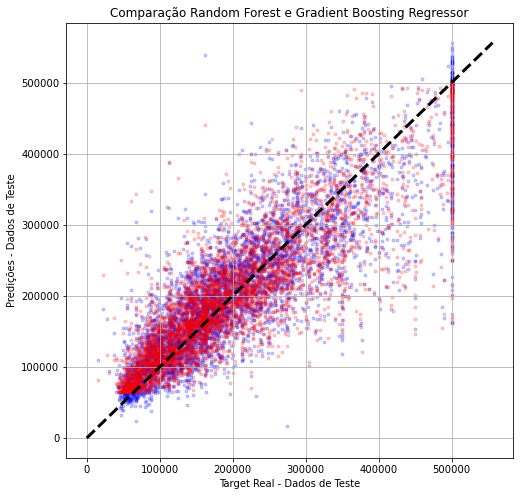

In [140]:
plt.figure(figsize=[8,8])
plt.title("Comparação Random Forest e Gradient Boosting Regressor")
plt.scatter(ytest, gbr.predict(Xtest), c = 'b', alpha = 0.2, marker = '.')
plt.scatter(ytest, rf.predict(Xtest), c = 'r', alpha = 0.2, marker = '.')
plt.xlabel("Target Real - Dados de Teste")
plt.ylabel("Predições - Dados de Teste")
plt.grid()
range_line = int(np.maximum(max(ytest), max(gbr.predict(Xtest))))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

__Os modelos de Random Forest com 1000 estimadores e profundidade máxima de 10 e o Gradient Boosting com 1000 estimadores e profundidade máxima de 2 obtiveram resultados muito próximos. Sendo considerados os melhores modelos em relação ao KNN__

=======================================================

## __Exercício 2:__ 
Crie uma classe para comparar o grid_search dentre vários modelos distintos.
    
    
Essa classe, gridSearchAll(), já está pré-desenvolvida no código abaixo. O exercício consiste de __completar essa classe.__ Para isso, crie o métodos fit_all, que irá treinar, usando grid_search, todos os grids que tenham sido pré-construídos e inseridos na classe.
Ainda, a quantidade de folds para a validação cruzada no grid_search deve ser implementada no método construtor da classe, bem como qual a métrica de performance a ser avaliada. 
Finalmente, salve o melhor modelo de cada grid e tenha um método best_all_grid_models que retorna o melhor modelo dentre todos os grids.

In [166]:
class gridSearchAll():
    
    def __init__(self, scoring, num_folds):
        self.grid_models = []
        self.scoring = scoring
        self.num_folds = num_folds
        self.grids = []
    
    def insert_model(self, estimator_base, param_grid):
        self.grid_models.append([estimator_base, param_grid])
        
    def fit_all(self, X,y):
        for est, param in self.grid_models:
            grid = GridSearchCV(estimator = est,
                                param_grid = param,
                                scoring = self.scoring,
                                cv = self.num_folds)
            grid.fit(X,y)
            
            self.grids.append(grid)
            
        print("All Fitted")
        
    def best_all_grid_models(self):
        best_models = []
        best_score = []
        for grid in self.grids:
            best_models.append(grid.best_estimator_)
            best_score.append(grid.best_score_)
        return [best_models, best_score]
    

In [167]:
gd = gridSearchAll('r2', 3)

In [168]:
gd.grid_models

[]

In [169]:
params_RF = {"n_estimators":[10, 1000], "max_depth":[2,10]}
params_RF

{'n_estimators': [10, 1000], 'max_depth': [2, 10]}

In [170]:
gd.insert_model(estimator_base = RandomForestRegressor(), param_grid = params_RF)

In [171]:
gd.grid_models

[[RandomForestRegressor(), {'n_estimators': [10, 1000], 'max_depth': [2, 10]}]]

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
gd.insert_model(estimator_base = KNeighborsRegressor(), param_grid = {"n_neighbors":[1,2,10]})

In [174]:
gd.grid_models

[[RandomForestRegressor(), {'n_estimators': [10, 1000], 'max_depth': [2, 10]}],
 [KNeighborsRegressor(), {'n_neighbors': [1, 2, 10]}]]

## __Exercício 3:__ 
Usando a classe criada, analise novamente os modelos criados no exercício 1.

In [175]:
gd.insert_model(estimator_base = GradientBoostingRegressor(), param_grid = {"n_estimators":[10, 1000], "max_depth":[2,10]})

In [176]:
gd.grid_models

[[RandomForestRegressor(), {'n_estimators': [10, 1000], 'max_depth': [2, 10]}],
 [KNeighborsRegressor(), {'n_neighbors': [1, 2, 10]}],
 [GradientBoostingRegressor(),
  {'n_estimators': [10, 1000], 'max_depth': [2, 10]}]]

In [177]:
gd.fit_all(Xtrain, ytrain)

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\JupyterLab\resour

All Fitted


In [178]:
gd.best_all_grid_models()

[[RandomForestRegressor(max_depth=10, n_estimators=1000),
  KNeighborsRegressor(n_neighbors=10),
  GradientBoostingRegressor(max_depth=2, n_estimators=1000)],
 [0.7359186080426414, 0.6842991364955503, 0.7286829930188276]]

__Assim como obido anteriormente, os modelos de Random Forest e Gradient Boost Regressor apresentaram resultados muito próximos, sendo os melhores modelos__